# No Name

Welcome to the No name Program. You can use this program to create various different types of HeatMaps based on your style.
You can use the bellow Menu to navigate through this notebook. 

Menu / Table of contents 

(1) Seperating your code based on your data table

(2) Comparing 2 columns in a HeatMap

(3) Seperating your columns into different categories of

(4) 3D HeatMap

## Option 1

In [1]:
## Imports, this cell can be ignored, Please make sure to run all cells to limit any errors
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# !pip install pandas
for isntaliation purposes

#### Please insert your File name or file path bellow. 

In [2]:
FileName = r'ogdseveritylabeled.csv'

#### You can uncomment intial_data.head() to confirm that your data has been imported correctly. The head method is showing the first 5 data rows of your data set that has been imported. Please double check that the correct data has been imported to limit any errors. 

In [3]:
initial_data = pd.read_csv(FileName)
## initial_data.head()
## you can uncomment the line above to double check your table

#### Please insert the 2 columns names in which you like to create your HeatMap with. Replace them with example

In [4]:
FirstSet = 'major_axis_length'
SecondSet = 'minor_axis_length'

###### Creating a data set and sorting the values

In [5]:
data = initial_data[[FirstSet, SecondSet]]
data.sort_values(by=[FirstSet])
data_small = data

#### Because outliers can make the graph to look very small, this code will remove it.  You can skip this cell if you do not want to remove any outliers, the graph could not be as clear as it would be without it. 

In [6]:
major_median = data[FirstSet].median()
major_stds =  data[SecondSet].std()
cut_off_high = major_median + 3 * major_stds
cut_off_low= major_median - 3 * major_stds
data_small = data[data.major_axis_length <= cut_off_high]
data_small = data_small[data_small.major_axis_length >= cut_off_low]

data_small is now our final dataset. 

## Option 2

### This is our first option for the HeatMaps. This is a hexagon Heatmap, this grab is in 2D. The Darker the color, the more intense data points are at that location. 

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

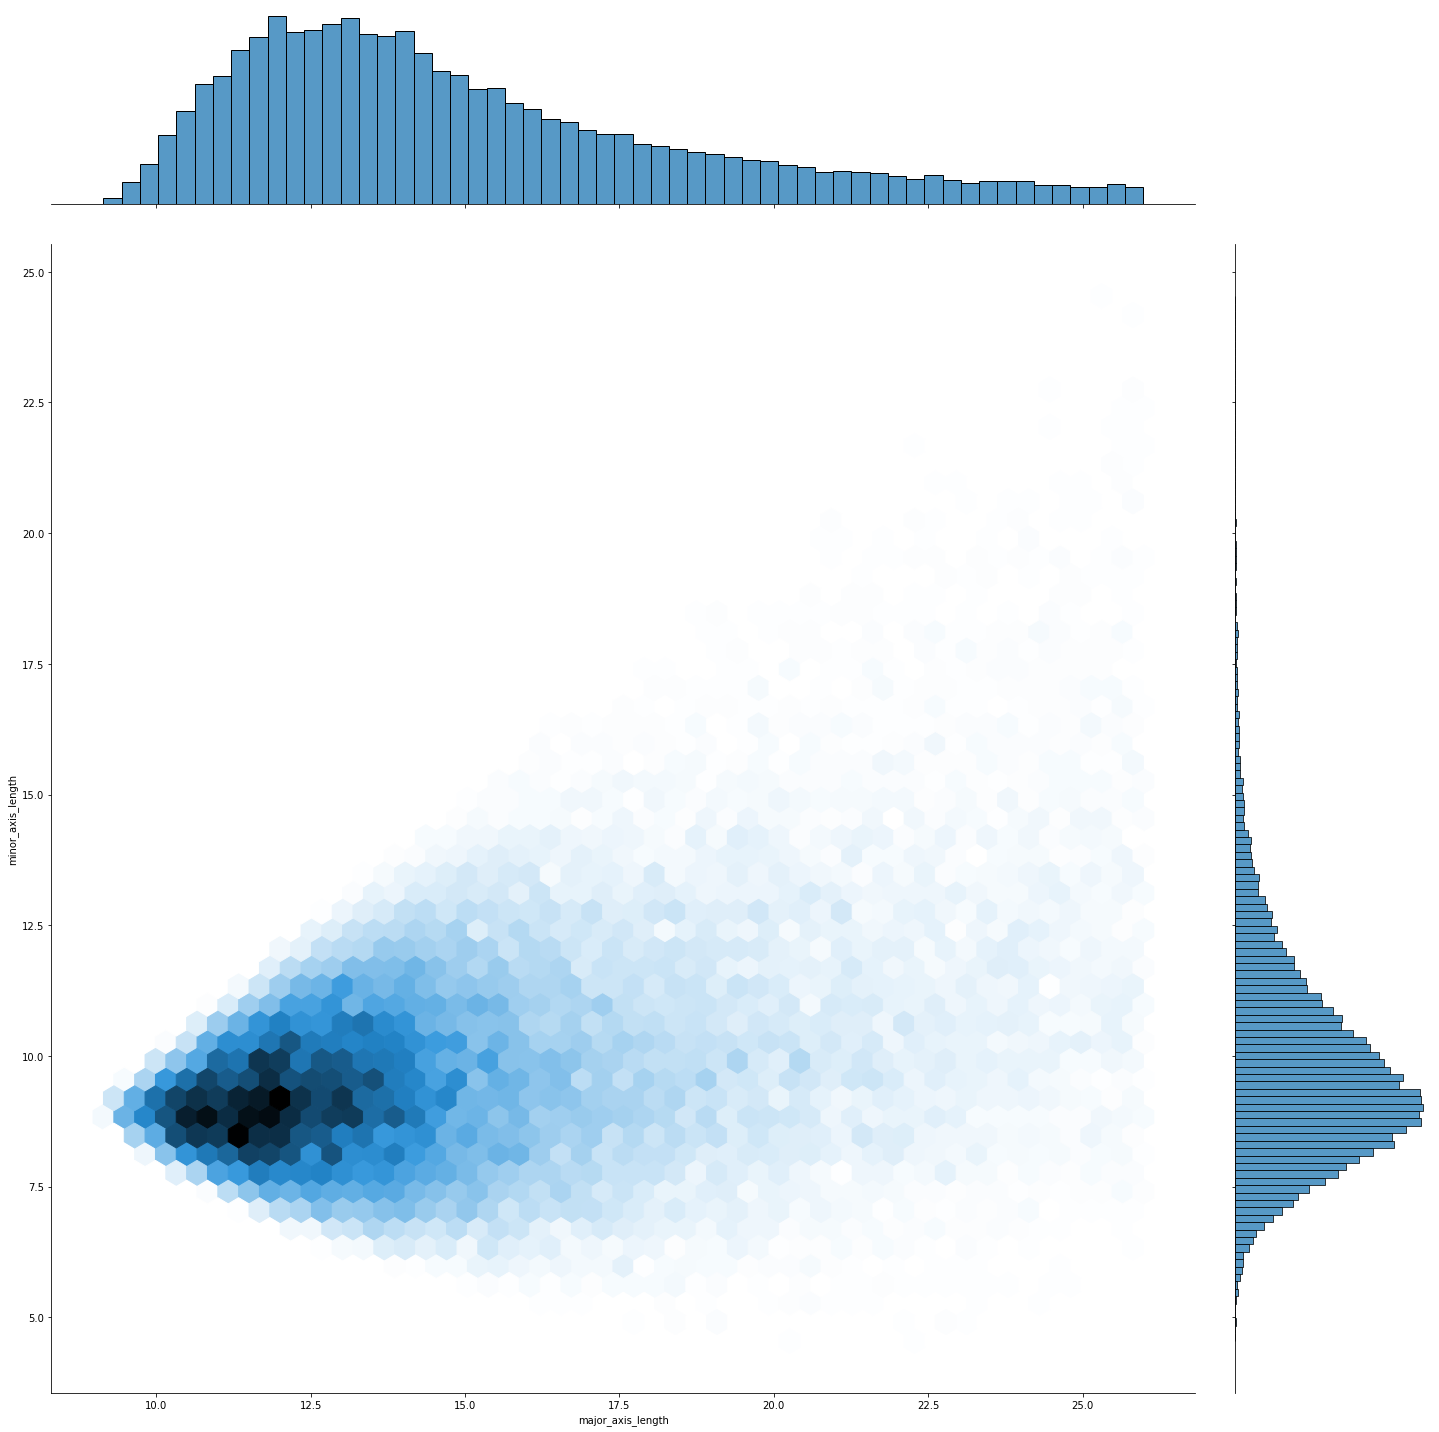

In [8]:
sns.jointplot(data=data_small, x='major_axis_length', y='minor_axis_length', kind='hex' ,height= 20)
plt.show()

# Option 3

### Seperating your data into categories, for example different treatment groups, or gender. 

### Please type the column name in which you like your data to be seperated based on those categories. 

for example a gender column would seperate your excel file into 2 new excel files in which one would be all datas that have the male category, and the other will be all the data with female. Your original data csv file will still be untouched. 

In [9]:
CategroyName = 'treatment_group'

In [10]:
initial_data["treatment_group"].unique()

array(['non-treated control', 'ogd 0.5 hours', 'ogd 1.5 hours',
       'ogd 3 hours', 'ogd 3 hours + SOD', nan], dtype=object)

#### This cell will now seperate your data and create multiple csv files in order to graph them better and more efficent. 

In [11]:
import csv

Category = []

with open(FileName) as fin:    
    csvin = csv.DictReader(fin)
    # Category -> open file lookup
    outputs = {}
    for row in csvin:
        cat = row[CategroyName]
        # Open a new file and write the header
        if cat not in outputs:
            Category.append(cat)
            fout = open('{}.csv'.format(cat), 'w')
            dw = csv.DictWriter(fout, fieldnames=csvin.fieldnames)
            dw.writeheader()
            outputs[cat] = fout, dw
        # Always write the row
        outputs[cat][1].writerow(row)
    # Close all the files
    for fout, _ in outputs.values():
        fout.close()
        
Category.pop(len(Category)-1)

''

#### Your different categories are now stored in a Category list as well.

if we use the example above with genders, this means that the list category now has stored the gender male and female. These are also the name of the new csv files that you have created, you can double check their existance in the file which this notebook as been stored in. 

#### Please enter the 2 columns in which you like to create your HeatMap with, this will be your X and Y axis. 

In [12]:
FirstSet ='major_axis_length'
SecondSet =  'minor_axis_length'

#### We will now create the graphs side to side.

we will be using a loop to create all the groups

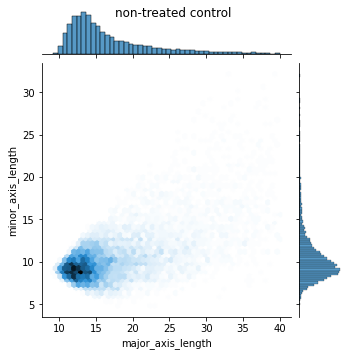

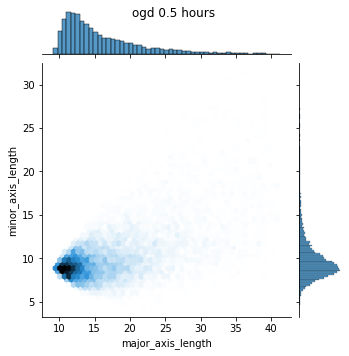

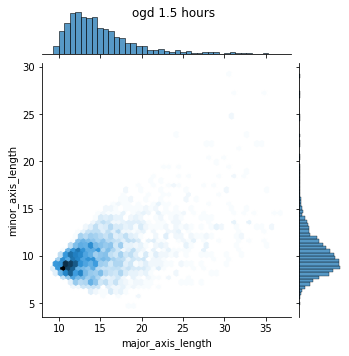

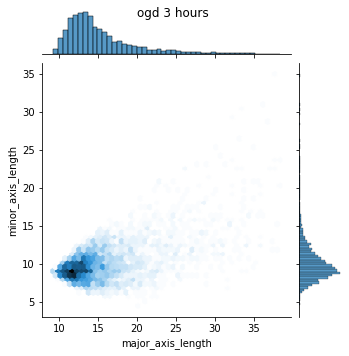

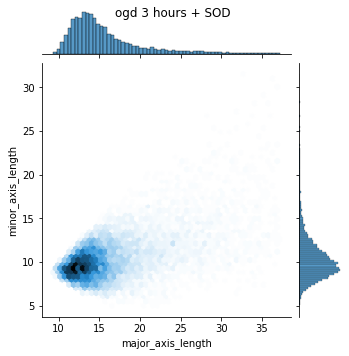

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

for r in Category:
    x = r + ".csv"
    initial_data = pd.read_csv(x)
    initial_data.head()

    dataGroup = initial_data[[FirstSet, SecondSet]]
    dataGroup.sort_values(by=[FirstSet])

    FirstSet_median =  dataGroup [FirstSet].median()
    FirstSet_stds   =  dataGroup [FirstSet].std()

    cut_off_high = FirstSet_median + 3 * FirstSet_stds
    cut_off_low  = FirstSet_median - 3 * FirstSet_stds

    data_small = dataGroup [dataGroup.major_axis_length <= cut_off_high]
    data_small = data_small [data_small.major_axis_length >= cut_off_low]
    
    p = sns.jointplot(data=data_small, x=FirstSet, y=SecondSet, kind='hex' ,height= 5)
    p.fig.suptitle(r)
    plt.show()

## option 4 

This will be a 3d graph that will show the data points, you can choose between all of the plots on all categories all in one z access, or seperating them into different z axis. 

In [14]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

#### This next cell is same steps as option 3, so if you have done option 3 already, you can skip, if you have not done option 3, please do the next 2 cells. 

#### Please type the column name in which you like your data to be seperated based on those categories.

for example a gender column would seperate your excel file into 2 new excel files in which one would be all datas that have the male category, and the other will be all the data with female. Your original data csv file will still be untouched.

In [15]:
CategroyName = 'treatment_group'
FileName = r'ogdseveritylabeled.csv'

#### We will now create the graphs side to side.
we will be using a loop to create all the groups

In [16]:
import csv

Category = []

with open(FileName) as fin:    
    csvin = csv.DictReader(fin)
    # Category -> open file lookup
    outputs = {}
    for row in csvin:
        cat = row[CategroyName]
        # Open a new file and write the header
        if cat not in outputs:
            Category.append(cat)
            fout = open('{}.csv'.format(cat), 'w')
            dw = csv.DictWriter(fout, fieldnames=csvin.fieldnames)
            dw.writeheader()
            outputs[cat] = fout, dw
        # Always write the row
        outputs[cat][1].writerow(row)
    # Close all the files
    for fout, _ in outputs.values():
        fout.close()
        
Category.pop(len(Category)-1)

''

#### Starting here we can plot our 3D graph, please do 

if you want all the datapoints to be at one z access 

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


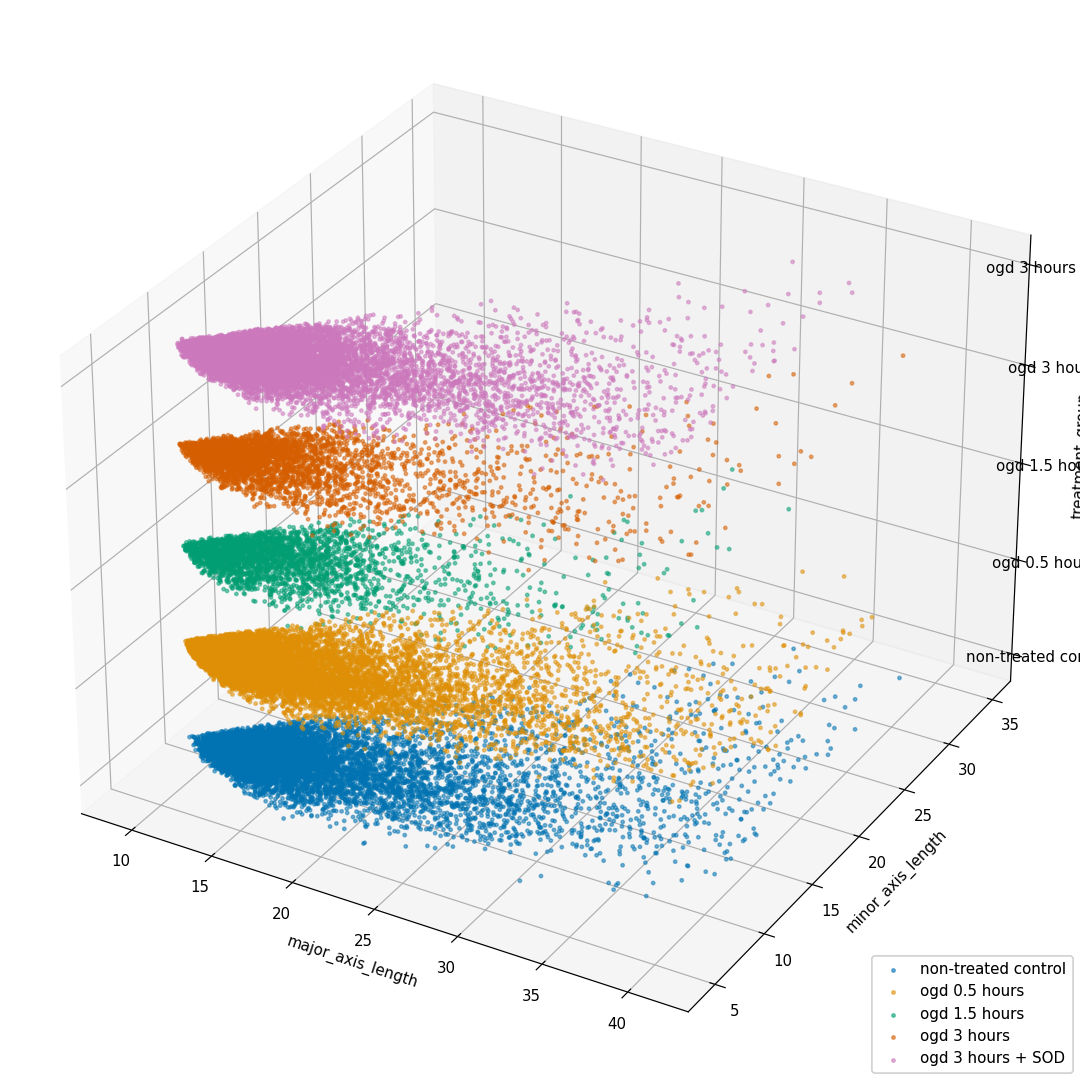

C:\Users\alito\AppData\Local\Temp/ipykernel_12588/2898895365.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'treatment_group')

In [17]:

%pylab inline
import re, seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
u = 0

FirstSet ='major_axis_length'
SecondSet =  'minor_axis_length'


size = len(Category)
color_pal = sns.color_palette("colorblind", size).as_hex()

for r in Category:
    xr = r+ ".csv"
    df = pd.read_csv(xr)
     
    # Comment the lines bellow if you would like to keep their outliers. 
    dataGroup = df[[FirstSet, SecondSet]]
    dataGroup.sort_values(by=[FirstSet])

    FirstSet_median =  dataGroup [FirstSet].median()
    FirstSet_stds   =  dataGroup [FirstSet].std()

    cut_off_high = FirstSet_median + 3 * FirstSet_stds
    cut_off_low  = FirstSet_median - 3 * FirstSet_stds

    data_small = dataGroup [dataGroup.major_axis_length <= cut_off_high]
    data_small = data_small [data_small.major_axis_length >= cut_off_low]
    
    
    x = data_small[FirstSet]
    y = data_small[SecondSet]
    sc = ax.scatter(x, y, u, c=color_pal[u], marker='.', cmap=cm, alpha=0.5)
    ax.set(zticks=range(len(Category)), zticklabels=Category)
    u = u + 1
    
    
legendc = plt.legend(Category, loc ="lower right")

ax.add_artist(legendc)
ax.set_xlabel(FirstSet)
ax.set_ylabel(SecondSet)
ax.set_zlabel(CategroyName)

<IPython.core.display.Javascript object>


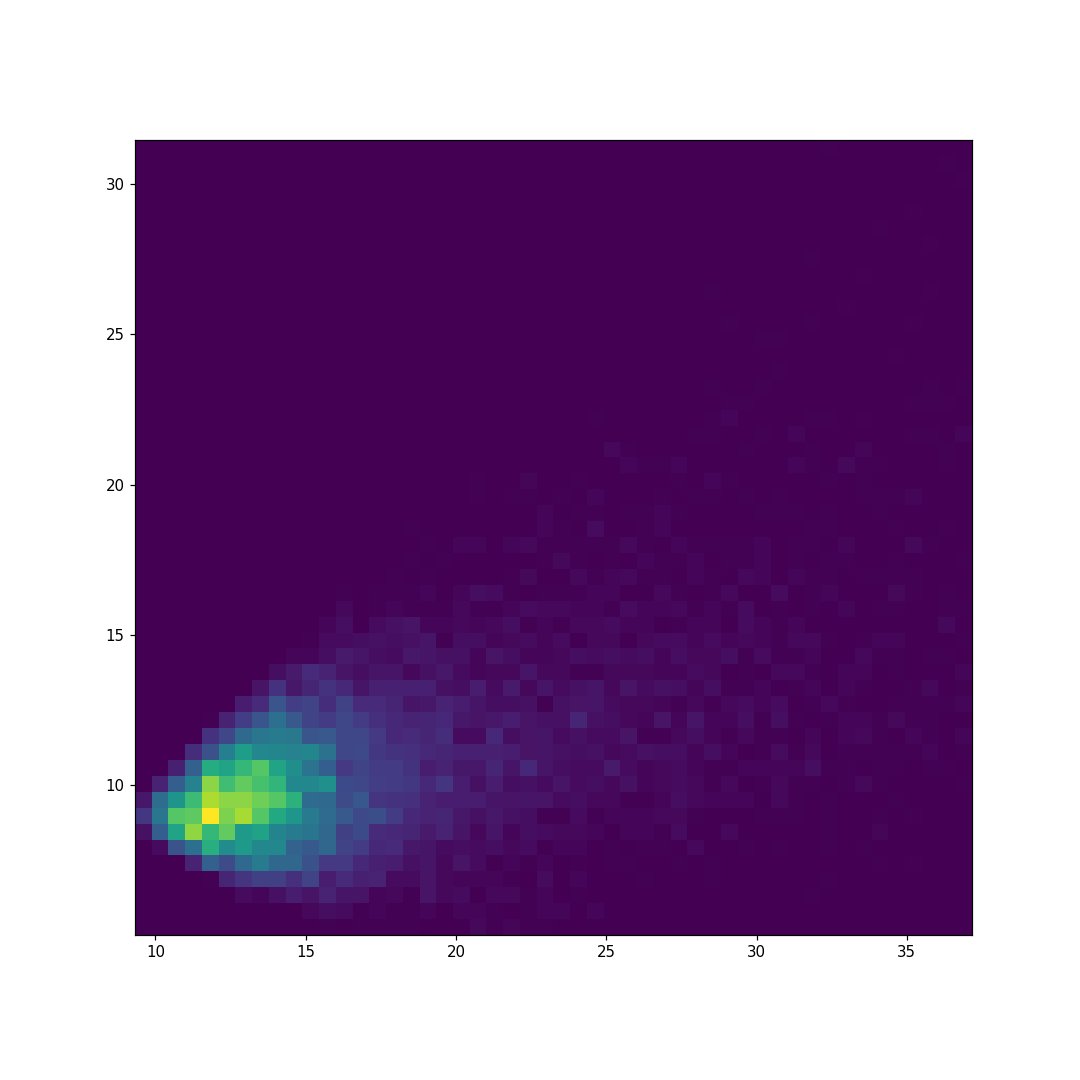

In [18]:
figx = plt.figure(figsize=(10,10))
      
x = data_small[FirstSet]
y = data_small[SecondSet]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()